# Анализ данных с Pandas

In [1]:
import pandas as pd
import numpy as np

Например, из последнего репозитория я взял данные соцопросов Census Income, с которым будем работать:

In [2]:
df = pd.read_csv('data/CensusIncome/adult.data.csv')

* __age__: continuous. 
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* __fnlwgt__: continuous. 
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* __education-num__: continuous. 
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* __sex__: Female, Male. 
* __capital-gain__: continuous. 
* __capital-loss__: continuous. 
* __hours-per-week__: continuous. 
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

`head()` показывает первые 5 строк датафрейма. 

`tail()` - последние 5.

`head(N)` показывает первые N строк датафрейма. 

`tail(N)` - последние N.

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Структура

In [18]:
q = pd.DataFrame(data={'a': ['abc', 'bcd', 'def'], 'b': [1,2,3], 'c': [100, 300, 200]}, index=[8,9,10])
q

,a,b,c
8,abc,1,100
9,bcd,2,300
10,def,3,200


In [19]:
q.index

Int64Index([8, 9, 10], dtype='int64')

In [20]:
q.columns

Index(['a', 'b', 'c'], dtype='object')

In [21]:
q.a

8     abc
9     bcd
10    def
Name: a, dtype: object

In [24]:
q['a']

8     abc
9     bcd
10    def
Name: a, dtype: object

In [22]:
type(q.a)

pandas.core.series.Series

In [23]:
q[:2]

,a,b,c
8,abc,1,100
9,bcd,2,300


In [25]:
q[['a']]

,a
8,abc
9,bcd
10,def


In [27]:
q[['a', 'b']][:2]

,a,b
8,abc,1
9,bcd,2


## Общее

Размер:

In [28]:
df.shape

(32561, 15)

Столбцы:

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Информация содержит данные о типе колонок, степени их заполненности (в нашем случае пропусков в данных нет), типе данных каждой из колонок, а также потреблении памяти:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Метод `describe` содержит основные статистики по числовым столбцам данных: 
* количество
* среднее
* среднеквадратичное отклонение
* минимум, максимум
* медиану
* первый и третий квартили

In [31]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Если хочется посмотреть и на нечисловые признаки, то нужно указать их тип в параметре `include`. Всего есть совсем немного основных: 
* `bool` - логический
* `object` - общий нечисловой, в большинстве случаев это строки
* `numeric` - числовой, включающий как числа с плавающей запятой, так и целые

In [32]:
df.describe(include=['object', 'bool'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Полезным методом является `value_counts()`, считающим распределение данных по категориям:

In [33]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Для отображения в долях существует флажок `normalize`:

In [34]:
df.education.value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

Недостаточно понятно? Построим!

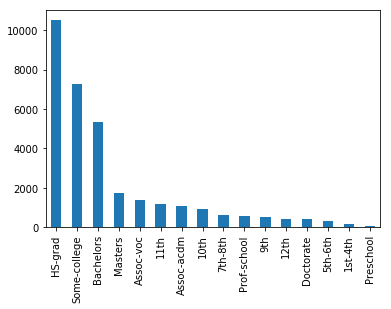

In [35]:
df.education.value_counts().plot(kind='bar');

## Индексация

Весь датафрейм:

In [36]:
df;

Только те, чей возраст меньше 25 лет:

In [38]:
df[df.age < 25];

Часто того же результата можно добиться с помощью `query`:

In [39]:
df.query('age < 25');

Только те, кто получают больше 50 000$:

In [40]:
df[df.salary == '>50K'];

In [43]:
df[df.salary == '<=50K'].sex.value_counts(normalize=False)

Male      15128
Female     9592
Name: sex, dtype: int64

In [44]:
df[df.salary == '>50K'].sex.value_counts(normalize=True)

Male      0.849637
Female    0.150363
Name: sex, dtype: float64

## Сортировка

In [45]:
df.sort_values(by=['education']);

Отсортируем сначала по полу, внутри пола - по возрасту, но в обратном порядке

In [46]:
df.sort_values(by=['sex', 'age'], ascending=[True, False]).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
4109,90,?,256514,Bachelors,13,Widowed,?,Other-relative,White,Female,991,0,10,United-States,<=50K
5272,90,Private,141758,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


## Применение функций

Применить функцию к каждому столбцу можно с помощью `apply`:

In [47]:
df.apply(np.max) # взяли максимум в каждом из столбцов

age                             90
workclass              Without-pay
fnlwgt                     1484705
education             Some-college
education-num                   16
marital-status             Widowed
occupation        Transport-moving
relationship                  Wife
race                         White
sex                           Male
capital-gain                 99999
capital-loss                  4356
hours-per-week                  99
native-country          Yugoslavia
salary                        >50K
dtype: object

In [52]:
df['education-num'].apply(lambda x: x+10).head()

0    23
1    23
2    19
3    17
4    23
Name: education-num, dtype: int64

Применение функции к каждой __ячейке__ реализовывается с помощью `map`:

In [53]:
renaming = {'>50K': 1, '<=50K': 0}
df.salary = df.salary.map(renaming)

In [54]:
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [55]:
renaming = {1:'> 50K', 0: '<= 50K'}
df.salary = df.salary.map(renaming)

In [56]:
df['sex'] = df['sex'].apply(lambda x: x.lower())
df['relationship'] = df['relationship'].apply(lambda x: x.lower())

In [57]:
# same as above:
cols = ['sex', 'relationship']
df[cols] = df[cols].applymap(lambda x: x.lower())

In [58]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,not-in-family,White,male,0,0,40,United-States,<= 50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K


## Дубликаты

In [65]:
q = pd.DataFrame(data={'a': [1,2,3,1,1], 'b': [1,2,3,2,1], 'c':[10,20,30,40,40]})
q

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40
4,1,1,40


In [69]:
q.duplicated(['a'])

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [70]:
q.duplicated(['a', 'b'])

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [72]:
q.drop_duplicates(subset=['a'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30


In [73]:
q.drop_duplicates(subset=['a', 'b'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40


## Группировка

In [75]:
df.groupby(['salary']);

__Важно__: groupby-объекты - не копии частей датафрейма!

In [76]:
df.groupby(['salary']).describe(include=['object', 'bool'])

education                         marital-status         \
           count unique        top  freq          count unique   
salary                                                           
<= 50K     24720     16    HS-grad  8826          24720      7   
> 50K       7841     15  Bachelors  2221           7841      7   

                                  native-country         ...     relationship  \
                       top   freq          count unique  ...              top   
salary                                                   ...                    
<= 50K       Never-married  10192          24720     42  ...    not-in-family   
> 50K   Married-civ-spouse   6692           7841     40  ...          husband   

                sex                     workclass                         
        freq  count unique   top   freq     count unique      top   freq  
salary                                                                    
<= 50K  7449  24720      2  male  15128     24720      9  Private  17733  
> 50K   5918   7841      2  male   6662      7841      7  Private   4963  

[2 rows x 32 columns]

In [78]:
df.groupby('salary')

In [85]:
df.groupby('salary').sex.value_counts()

salary  sex   
<= 50K  male      15128
        female     9592
> 50K   male       6662
        female     1179
Name: sex, dtype: int64

## Таблицы сопряженности и сводные таблицы

### Таблицы сопряженности

In [90]:
pd.crosstab(df.salary, df.sex)

sex,female,male
salary,,
<= 50K,9592,15128
> 50K,1179,6662


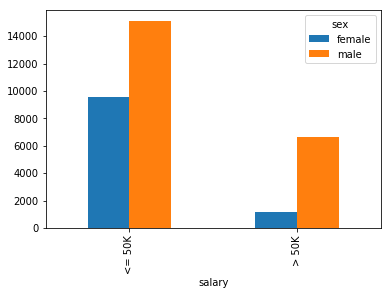

In [93]:
pd.crosstab(df.salary, df.sex).plot(kind='bar');

In [94]:
pd.crosstab(df.salary, df.sex, normalize=True)

sex,female,male
salary,,
<= 50K,0.294586,0.464605
> 50K,0.036209,0.204601


In [64]:
pd.crosstab(df.salary, df['marital-status'], normalize=True)

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
salary,,,,,,,
<=50K,0.122232,0.000399,0.254415,0.011793,0.313012,0.029452,0.027886
>50K,0.014219,0.000307,0.205522,0.001044,0.015079,0.002027,0.002610


### Сводные таблицы

In [65]:
df.pivot_table(['salary'], ['education'], aggfunc='count').head(10)

,salary
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


## Изменение таблиц

In [95]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,not-in-family,White,male,0,0,40,United-States,<= 50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K


### Добавление нового столбца

In [96]:
df['working_days'] = df['hours-per-week'] / 8.0

In [97]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,not-in-family,White,male,0,0,40,United-States,<= 50K,5.000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K,5.000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K,5.000


In [98]:
df['constant'] = 1

In [99]:
df = df.assign(anotherConstant = lambda dataframe: dataframe.constant*2)

In [100]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days,constant,anotherConstant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.0,1,2


### Удаление строк и столбцов

In [101]:
df.drop(['constant', 'anotherConstant'], axis=1, inplace=True)

__NB__: У большинства операторов pandas есть флажок `inplace`. Если он выставлен в `False` (по умолчанию именно так), то изменения, например, как `drop` в примере выше, не будут изменять таблицу, а вернут измененную копию.

In [102]:
df.drop([1,2]).head(3) # => удаляет строки

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K,5.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K,5.0


### Переименование столбцов

In [103]:
df.columns = [c.lower() for c in df.columns]

In [104]:
df = df.rename(columns={'marital-status': 'marital_status'})
                        # словарь старое-новое значение

## Работа с пропущенными (NaN) значениями

In [105]:
test = pd.DataFrame(data={'name': ['John', 'Bill', 'Jennifer', 'Max'], 
                          'salary': [90, np.nan, 95, 130], 
                          'age': [27, 30, np.nan, np.nan],
                          'status': [np.nan, 'married', np.nan, 'married']
                         })
test = test[['name', 'age', 'salary', 'status']]
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


### Отображение

In [106]:
test[test['age'].isnull()]

,name,age,salary,status
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [107]:
test[test['age'].notnull()]

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married


In [108]:
test[test.isnull().any(axis=1)]

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [109]:
test[~test.isnull().any(axis=1)]

,name,age,salary,status


### Заполнение

Прежде всего, можно заполнить некоторым константным значением:

In [110]:
dashtest = test.fillna('-')
dashtest

,name,age,salary,status
0,John,27,90,-
1,Bill,30,-,married
2,Jennifer,-,95,-
3,Max,-,130,married


Важно заметить, что теперь слобцы возраста и зарплаты более не числовые:

In [111]:
print(test.dtypes, '\n\n', dashtest.dtypes)

name       object
age       float64
salary    float64
status     object
dtype: object 

 name      object
age       object
salary    object
status    object
dtype: object


In [112]:
test.fillna(method='ffill')

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [113]:
test.fillna(method='bfill')

,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,married
3,Max,NaN,130.0,married


In [114]:
test.fillna(method='ffill').fillna(method='bfill')

,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [115]:
test['salary'] = test[['salary']].fillna(test.salary.mean())
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,105.0,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [116]:
test['age'] = test[['salary']].fillna(25)
test['status'] = test[['status']].fillna(test.status.mode()[0])
test

,name,age,salary,status
0,John,90.0,90.0,married
1,Bill,105.0,105.0,married
2,Jennifer,95.0,95.0,married
3,Max,130.0,130.0,married


https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf